# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-danger">

<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Taina !😊. Seu projeto já está com uma qualidade boa. Gostei muito da sua análise temporal, no entanto o projeto exige analise temporal em coortes. Adicionei comentários com dicas de como resolvermos essas análises. Os pontos necessários de ajustes são: 

    - Ajustes na taxa de retenção 
    - Cálculo de LTV por coortes 
    - Cálculo CAC e ROI por coortes 
    
Boa sorte! Estamos próximas da aprovação!🤞 

Em caso de dúvidas, não hesite em nos perguntar!
</div>

<div class="alert alert-block alert-success">

<b>Comentário geral v2: </b> <a class="tocSkip"></a>
    
Muuito obrigada pelos ajustes! O projeto está aprovado!

In [1]:
#Importando as bibliotecas necessárias:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Carregando os arquivos e exibindo as primeiras linhas:

costs_df = pd.read_csv("/datasets/costs_us.csv")
orders_df = pd.read_csv("/datasets/orders_log_us.csv")
visits_df = pd.read_csv("/datasets/visits_log_us.csv")

costs_df.head(), orders_df.head(), visits_df.head()

(   source_id          dt  costs
 0          1  2017-06-01  75.20
 1          1  2017-06-02  62.25
 2          1  2017-06-03  36.53
 3          1  2017-06-04  55.00
 4          1  2017-06-05  57.08,
                 Buy Ts  Revenue                   Uid
 0  2017-06-01 00:10:00    17.00  10329302124590727494
 1  2017-06-01 00:25:00     0.55  11627257723692907447
 2  2017-06-01 00:27:00     0.37  17903680561304213844
 3  2017-06-01 00:29:00     0.55  16109239769442553005
 4  2017-06-01 07:58:00     0.37  14200605875248379450,
     Device               End Ts  Source Id             Start Ts  \
 0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
 1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
 2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
 3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
 4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
 
                     Uid  
 0  16879256277535980062  
 1    

In [3]:
#Obtendo informações sobre os dados

costs_df.info(), orders_df.info(), visits_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object


(None, None, None)

In [4]:
costs_df.describe(), orders_df.describe(), visits_df.describe()

(         source_id        costs
 count  2542.000000  2542.000000
 mean      4.857199   129.477427
 std       3.181581   156.296628
 min       1.000000     0.540000
 25%       2.000000    21.945000
 50%       4.000000    77.295000
 75%       9.000000   170.065000
 max      10.000000  1788.280000,
             Revenue           Uid
 count  50415.000000  5.041500e+04
 mean       4.999647  9.098161e+18
 std       21.818359  5.285742e+18
 min        0.000000  3.135781e+14
 25%        1.220000  4.533567e+18
 50%        2.500000  9.102274e+18
 75%        4.890000  1.368290e+19
 max     2633.280000  1.844617e+19,
            Source Id           Uid
 count  359400.000000  3.594000e+05
 mean        3.750515  9.202557e+18
 std         1.917116  5.298433e+18
 min         1.000000  1.186350e+13
 25%         3.000000  4.613407e+18
 50%         4.000000  9.227413e+18
 75%         5.000000  1.372824e+19
 max        10.000000  1.844668e+19)

In [5]:
# Convertendo colunas de data para formato apropriado (datetime):

costs_df['dt'] = pd.to_datetime(costs_df['dt'])
orders_df['Buy Ts'] = pd.to_datetime(orders_df['Buy Ts'])
visits_df['Start Ts'] = pd.to_datetime(visits_df['Start Ts'])
visits_df['End Ts'] = pd.to_datetime(visits_df['End Ts'])

visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Text(0.5, 1.0, 'Mensal')

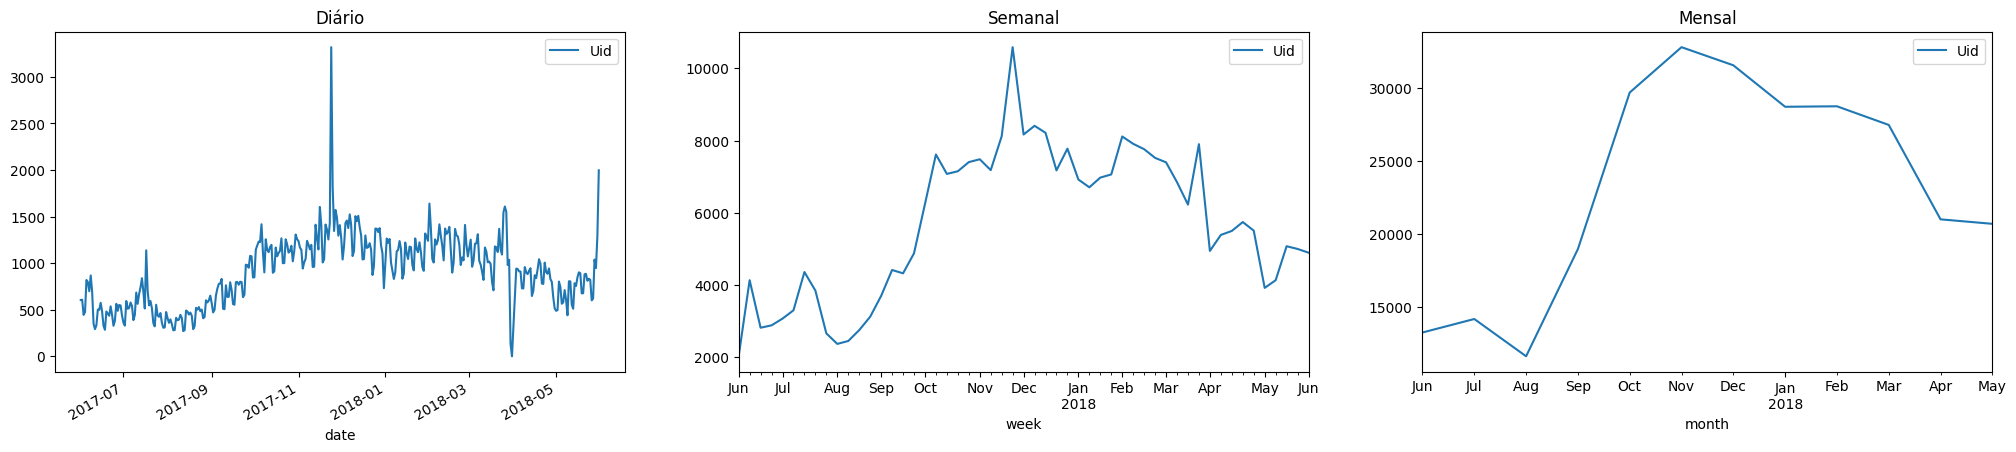

In [6]:
#Contando quantas visitas por dia, semana e mês para usuários únicos:

visits_df["date"] = pd.to_datetime(visits_df["Start Ts"].dt.date)
visits_df["week"] = visits_df["Start Ts"].dt.to_period("W")
visits_df["month"] = visits_df["Start Ts"].dt.to_period("M")

fig, ax = plt.subplots(1, 3, figsize=(25, 5))
user_counts_daily = visits_df.groupby("date").agg({"Uid" : "nunique"})
user_counts_daily.plot(ax = ax[0])
ax[0].set_title("Diário")

user_counts_weekly = visits_df.groupby("week").agg({"Uid" : "nunique"})
user_counts_weekly.plot(ax = ax[1])
ax[1].set_title("Semanal")

user_counts_monthly = visits_df.groupby("month").agg({"Uid" : "nunique"})
user_counts_monthly.plot(ax = ax[2])
ax[2].set_title("Mensal")

In [7]:
#Duração das visitas:
visits_df['duration'] = visits_df['End Ts'] - visits_df['Start Ts']
visits_df['duration'] = visits_df['duration'].dt.seconds

<AxesSubplot:>

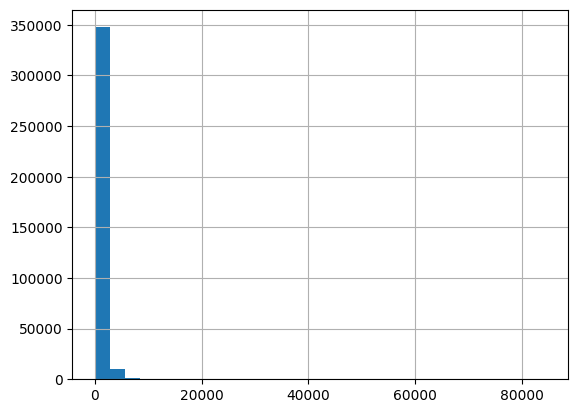

In [8]:
visits_df['duration'].hist(bins=30)

<AxesSubplot:xlabel='date'>

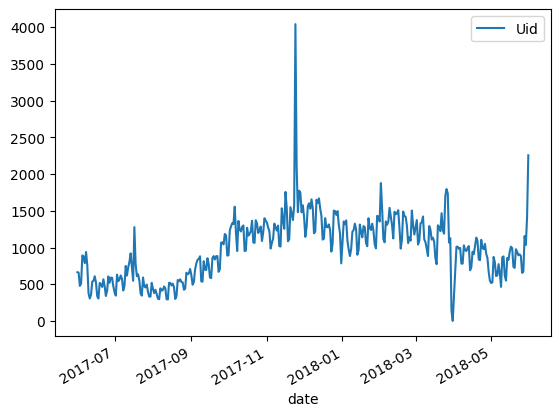

In [9]:
#Contagem de sessões diarias:
daily_sessions = visits_df.groupby("date").agg({"Uid":"count"}) 
daily_sessions.plot()

In [10]:
returning_users = visits_df.groupby("Uid")["date"].nunique().reset_index(name="Days Active")

In [11]:
returning_users["Days Active"].describe()

count    228169.000000
mean          1.448527
std           2.610167
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         259.000000
Name: Days Active, dtype: float64

Em média os usuarios tem 1,45 dias ativos e a mediana igual a 1 indica que a maioria dos usuarios usa o produto apenas uma vez.

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- Os dados foram carregados corretamente.
- Foram utilizados comandos como `head()`e `info()`.
- Bom uso das visualizações gráficas! É uma ótima forma de enriquecer ainda mais a análise exploratória dos dados.
- Aluna adicionou comentários com suas observações osbre os dados.
</div>

Vendas: Analises

In [12]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
 5   date       359400 non-null  datetime64[ns]
 6   week       359400 non-null  period[W-SUN] 
 7   month      359400 non-null  period[M]     
 8   duration   359400 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(1), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 24.7+ MB


In [13]:
#Separando em coortes por mes (identificando o mes da primeira visita e agrupando e em seguida transformando em um df)
first_visits = visits_df.groupby("Uid").agg({"month" : "min"}).reset_index().rename(columns = {"month" : "first_month"})

In [14]:
first_visits.head()

,Uid,first_month
0,11863502262781,2018-03
1,49537067089222,2018-02
2,297729379853735,2017-06
3,313578113262317,2017-09
4,325320750514679,2017-09


In [15]:
#Juntando o df de visits com o df de first_visits pelo metodo merge atrasves da coluna Uid
visits_with_first_visit = visits_df.merge(first_visits, on = 'Uid', how = 'left')

In [16]:
visits_with_first_visit.head()

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,duration,first_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,1080,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,1680,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,0,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,1440,2018-03
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,0,2017-12


In [17]:
visits_with_first_visit['month_diff'] = visits_with_first_visit['month'].astype(int)- visits_with_first_visit['first_month'].astype(int)

In [18]:
visits_with_first_visit.head()

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,duration,first_month,month_diff
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,1080,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,1680,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,0,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,1440,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,0,2017-12,0


In [19]:
retention_table = visits_with_first_visit.pivot_table(index = 'first_month' , columns = 'month_diff', values = 'Uid' , aggfunc = 'nunique').fillna('')

In [20]:
retention_table

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


In [21]:
retention_table.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 12 entries, 2017-06 to 2018-05
Freq: M
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     object 
 2   2       12 non-null     object 
 3   3       12 non-null     object 
 4   4       12 non-null     object 
 5   5       12 non-null     object 
 6   6       12 non-null     object 
 7   7       12 non-null     object 
 8   8       12 non-null     object 
 9   9       12 non-null     object 
 10  10      12 non-null     object 
 11  11      12 non-null     object 
dtypes: float64(1), object(11)
memory usage: 1.2+ KB


In [22]:
retention_table = retention_table.apply(pd.to_numeric, errors='coerce')

In [23]:
retention_table.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 12 entries, 2017-06 to 2018-05
Freq: M
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       11 non-null     float64
 2   2       10 non-null     float64
 3   3       9 non-null      float64
 4   4       8 non-null      float64
 5   5       7 non-null      float64
 6   6       6 non-null      float64
 7   7       5 non-null      float64
 8   8       4 non-null      float64
 9   9       3 non-null      float64
 10  10      2 non-null      float64
 11  11      1 non-null      float64
dtypes: float64(12)
memory usage: 1.2 KB


In [24]:
#Transformando as coortes em %:
retention_rates = retention_table.copy()

for col in retention_rates.columns[1:]:
    retention_rates[col] = retention_rates[col] / retention_rates[0]
retention_rates[0] = retention_rates[0] / retention_rates[0]
retention_rates.fillna('')

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02,1.0,0.05708,0.025454,0.020093,,,,,,,,


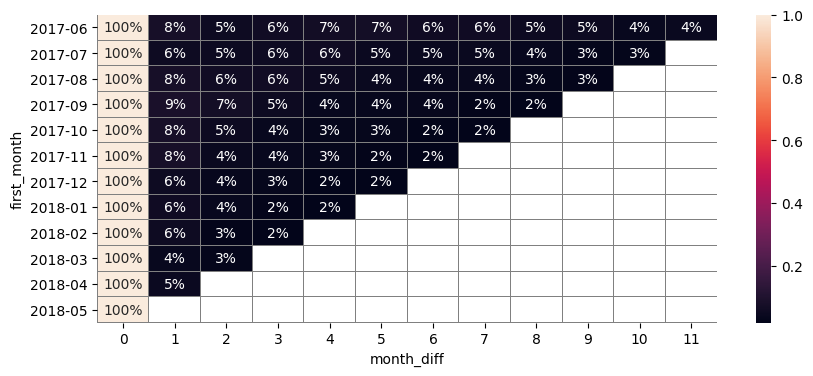

In [25]:
fig, ax = plt.subplots(figsize = (10,4))

sns.heatmap(retention_rates, annot=True, fmt=".0%", linewidths=0.1, linecolor='grey', ax=ax)
plt.show()

In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [27]:
# Analise de retenção financeira:

first_visits_orders = first_visits.merge(orders_df, on = 'Uid')
first_visits_orders.head()

,Uid,first_month,Buy Ts,Revenue
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55
1,1575281904278712,2017-06,2017-06-03 10:13:00,1.22
2,1575281904278712,2017-06,2017-06-03 17:39:00,1.83
3,2429014661409475,2017-10,2017-10-11 18:33:00,73.33
4,2464366381792757,2018-01,2018-01-28 15:54:00,2.44


In [28]:
#2.2 Transformar para mês 
first_visits_orders['month']= first_visits_orders['Buy Ts'].dt.to_period("M")

#2.3 Fazer a difereça entre os meses
first_visits_orders['month_diff_order'] = first_visits_orders['month'].astype(int) -  first_visits_orders['first_month'].astype(int)


In [29]:
purchase_by_user = first_visits_orders.groupby(['Uid', 'month', 'first_month', 'month_diff_order'])['Revenue'].sum().reset_index()

purchase_by_user.head()

,Uid,month,first_month,month_diff_order,Revenue
0,313578113262317,2018-01,2017-09,4,0.55
1,1575281904278712,2017-06,2017-06,0,3.05
2,2429014661409475,2017-10,2017-10,0,73.33
3,2464366381792757,2018-01,2018-01,0,2.44
4,2551852515556206,2017-11,2017-11,0,10.99


In [30]:
retation_table_order = purchase_by_user.pivot_table(index = 'first_month' , columns = 'month_diff_order', values = 'Revenue' , aggfunc = 'sum').fillna('')

In [31]:
#Tabela de retenção financeira
retation_table_order

month_diff_order,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,9557.49,2664.58,1464.69,3882.09,3940.59,2824.48,3489.95,2270.81,2317.91,3481.64,2204.01,1927.81
2017-07,9874.89,1059.28,1108.9,982.96,846.99,798.08,588.0,770.3,724.52,591.03,467.16,
2017-08,6234.81,997.32,1001.35,946.21,810.04,532.9,486.65,1246.23,830.64,375.72,,
2017-09,12357.20,3700.48,2110.63,10438.93,1288.48,1910.05,966.84,491.38,418.57,,,
2017-10,18362.32,3809.83,1327.02,1058.05,1043.47,1022.19,578.91,655.9,,,,
2017-11,16531.79,2667.58,1342.85,1369.53,1108.74,707.63,698.6,,,,,
2017-12,16857.00,1739.03,4198.3,5123.82,1457.57,1782.13,,,,,,
2018-01,10597.01,1951.70,1164.76,305.88,527.47,,,,,,,
2018-02,11512.63,1984.46,663.19,901.01,,,,,,,,


In [34]:
#Tabela de retenção financeira em %
retention_rates_order = retention_rates_order.apply(pd.to_numeric, errors='coerce')
retention_rates = retention_rates_order.copy()

for col in retention_rates.columns[1:]:
    retention_rates[col] = retention_rates[col] / retention_rates[0]
retention_rates[0] = retention_rates[0] / retention_rates[0]

retention_rates = retention_rates.fillna('0')
retention_rates

NameError: name 'retention_rates_order' is not defined

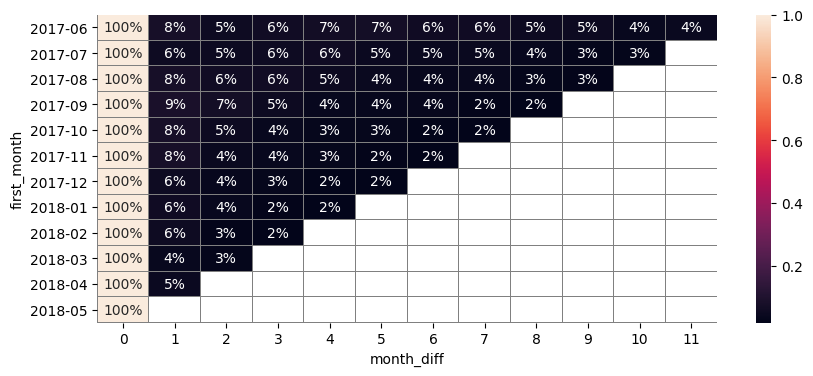

In [35]:
retention_rates = retention_rates.apply(pd.to_numeric, errors='coerce')

fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(retention_rates, annot=True, fmt=".0%", linewidths=0.1, linecolor='grey', ax=ax)
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

São necessários ajustes na a taxa de retenção por coorte.

O passo a passo é o seguinte:
    
1. Você precisa pegar a data do primeiro acesso de cada usuário
2. Para calcular o intervalo ou cohort de acesso para cada usuário, você precisa calcular o intervalo entre o acesso atual e o primeiro acesso:</s>
3. A partir desses dados, você pode criar uma tabela dinâmica (`pivot_table`) que indexa por cada mês do conjunto de dados e calcula a quantidade de usuários que teve o primeiro acesso naquele mês e voltou a acessar no futuro (`cohort`): 1 mês depois, 2 meses depois, etc. </s>
<s>Exemplo: 

```python

# Calcula a vida útil de cada visita em meses
df_visits['lifetime'] = (df_visits['month'] - df_visits['first_month']).apply(lambda x: x.n)

# Calcula a coorte de usuários por mês de primeira visita e tempo de vida
cohort = df_visits.groupby(['first_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()

# Seleciona a coorte inicial (lifetime == 0) e renomeia a coluna de contagem de usuários
inicial = cohort[cohort['lifetime'] == 0][['first_month', 'uid']]
inicial = inicial.rename(columns={'uid': 'users'})

# Junta a coorte inicial com a coorte completa e calcula a taxa de retenção
cohort = cohort.merge(inicial, on='first_month')
cohort['retention'] = cohort['uid'] / cohort['users']

# Cria uma tabela dinâmica de retenção por mês de primeira visita e tempo de vida
retention_pivot = cohort.pivot_table(index='first_month', columns='lifetime', values='retention', aggfunc='sum')

# Imprime a tabela de retenção
print(retention_pivot)
```

O output esperado deve ser semelhante a esse: 
    ![image.png](attachment:image.png)

</div>

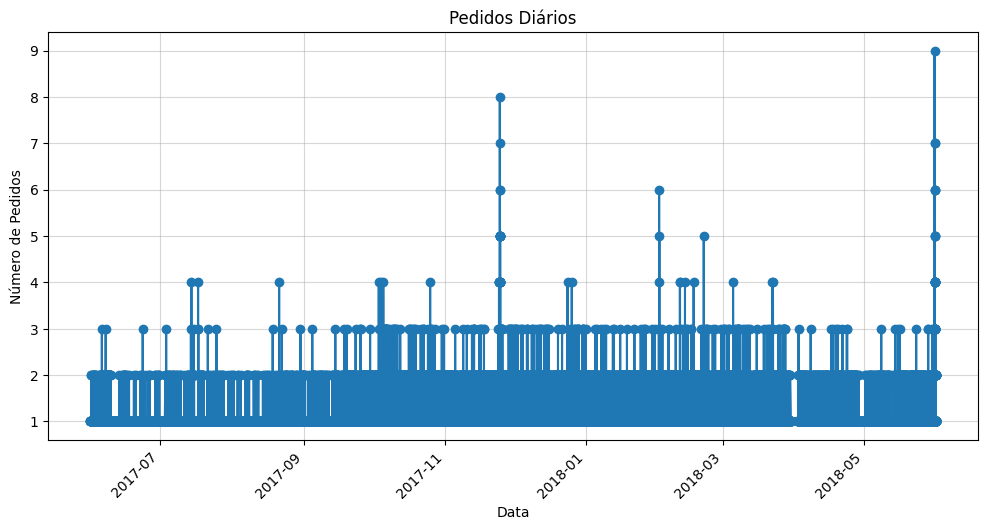

In [36]:
#Contagem de pedidos diarios
daily_orders = orders_df.groupby('Buy Ts').size()

plt.figure(figsize=(12, 6))
daily_orders.plot(marker='o')
plt.title("Pedidos Diários")
plt.xlabel("Data")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

In [37]:
#Volume médio de compra:

volume_medio = orders_df['Revenue'].mean()
print("Volume médio de uma compra:", volume_medio)

Volume médio de uma compra: 4.999646930477041


In [38]:
# LTV individual:
ltv_por_usuario = orders_df.groupby("Uid")["Revenue"].sum().reset_index(name="LTV")
print(ltv_por_usuario.head())

# LTV médio
ltv_medio = ltv_por_usuario["LTV"].mean()
print("LTV médio: R$", ltv_medio)

                Uid    LTV
0   313578113262317   0.55
1  1575281904278712   3.05
2  2429014661409475  73.33
3  2464366381792757   2.44
4  2551852515556206  10.99
LTV médio: R$ 6.901327930345262


<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
    
A análise LTV também deve ser feita por coorte. 

Exemplo: 
    
```python 
#calculando a quantidade de dinheiro que o usuários trazem para a empresa (lifetime value)

#derivando a coluna first_order_month
first_orders = first_order.copy()
first_orders['first_order_month'] = first_orders['first_order_date'].dt.to_period('M')

#calculando o número de clientes, por mês da primeira compra
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

margin_rate = 0.4

#mesclando as informações de pedidos com a primeira compra por cliente
df_orders_ = pd.merge(df_orders, fi..continue o código

#calculando a receita por coorte e mês
cohorts = (
    df_orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())

#mesclando o tamanho da coorte com a receita
report = pd.merge(cohort_sizes,...continue o código

```
    
Exemplo de output:
    
![image.png](attachment:image.png)

</div>

LTV POR COORTES:

In [39]:
first_visits_orders.head()

,Uid,first_month,Buy Ts,Revenue,month,month_diff_order
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01,4
1,1575281904278712,2017-06,2017-06-03 10:13:00,1.22,2017-06,0
2,1575281904278712,2017-06,2017-06-03 17:39:00,1.83,2017-06,0
3,2429014661409475,2017-10,2017-10-11 18:33:00,73.33,2017-10,0
4,2464366381792757,2018-01,2018-01-28 15:54:00,2.44,2018-01,0


In [40]:
cohort_sizes = first_visits_orders.groupby('first_month')['Uid'].nunique().reset_index().rename(columns = {'Uid' : 'n_buyers'})

df_ltv = pd.merge(left = first_visits_orders, right =cohort_sizes , on= 'first_month')

In [41]:
df_ltv

,Uid,first_month,Buy Ts,Revenue,month,month_diff_order,n_buyers
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01,4,3058
1,12695041396440380,2017-09,2017-09-01 23:54:00,7.33,2017-09,0,3058
2,12695041396440380,2017-09,2017-09-02 00:02:00,7.33,2017-09,0,3058
3,16118742129536584,2017-09,2017-09-30 10:23:00,0.18,2017-09,0,3058
4,16118742129536584,2017-09,2017-10-21 11:22:00,0.40,2017-10,1,3058
...,...,...,...,...,...,...,...
50410,18413403606138337462,2018-05,2018-05-11 20:52:00,10.08,2018-05,0,2316
50411,18417227789295707563,2018-05,2018-05-06 17:47:00,1.16,2018-05,0,2316
50412,18418973552381796231,2018-05,2018-05-18 19:49:00,0.73,2018-05,0,2316
50413,18419772037216346332,2018-05,2018-05-18 15:28:00,0.61,2018-05,0,2316


In [42]:
df_ltv['LTV'] = df_ltv['Revenue']/df_ltv['n_buyers']

df_ltv.pivot_table(index = 'first_month', columns = 'month_diff_order', values = 'LTV', aggfunc = 'sum').cumsum(axis = 1)

month_diff_order,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,3.269754,4.181345,4.682436,6.010554,7.358686,8.324981,9.518943,10.295819,11.088809,12.279928,13.033951,13.693483
2017-07,4.017449,4.448401,4.899540,5.299443,5.644028,5.968714,6.207933,6.521318,6.816078,7.056530,7.246587,NaN
2017-08,3.622783,4.202284,4.784126,5.333928,5.804608,6.114253,6.397025,7.121156,7.603806,7.822121,NaN,NaN
2017-09,4.040942,5.251040,5.941239,9.354886,9.776233,10.400840,10.717008,10.877695,11.014572,NaN,NaN,NaN
2017-10,3.925250,4.739664,5.023337,5.249513,5.472572,5.691082,5.814833,5.955043,NaN,NaN,NaN,NaN
2017-11,3.878881,4.504779,4.819855,5.141190,5.401335,5.567367,5.731281,NaN,NaN,NaN,NaN,NaN
2017-12,4.137703,4.564563,5.595074,6.852761,7.210535,7.647975,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,3.397567,4.023312,4.396752,4.494822,4.663937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,3.613506,4.236375,4.444532,4.727335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Marketing: Análises

In [43]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [44]:
#Gasto total:
total_gasto = costs_df['costs'].sum()
print("Gasto total: R$", total_gasto)

Gasto total: R$ 329131.62



Gasto por Fonte:
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


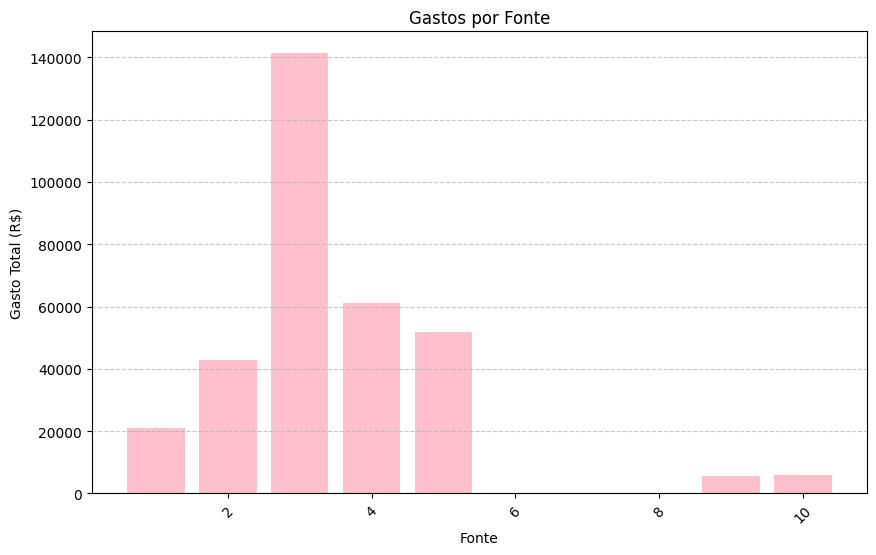

In [45]:
#Gasto por fonte:
gasto_por_fonte = costs_df.groupby("source_id")["costs"].sum().reset_index()
print("\nGasto por Fonte:")
print(gasto_por_fonte)

plt.figure(figsize=(10, 6))
plt.bar(gasto_por_fonte["source_id"], gasto_por_fonte["costs"], color="pink")
plt.title("Gastos por Fonte")
plt.xlabel("Fonte")
plt.ylabel("Gasto Total (R$)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle="--", alpha=0.7)
plt.show()


In [46]:
# Gasto ao Longo do Tempo
costs_df["date"] = costs_df["dt"].dt.date

# Agrupando os gastos por dia
gasto_diario = costs_df.groupby("date")["costs"].sum()
print(gasto_diario)

date
2017-06-01     735.26
2017-06-02     721.19
2017-06-03     450.85
2017-06-04     761.16
2017-06-05     821.44
               ...   
2018-05-27     532.87
2018-05-28     619.44
2018-05-29     784.79
2018-05-30    1183.00
2018-05-31    2153.70
Name: costs, Length: 364, dtype: float64


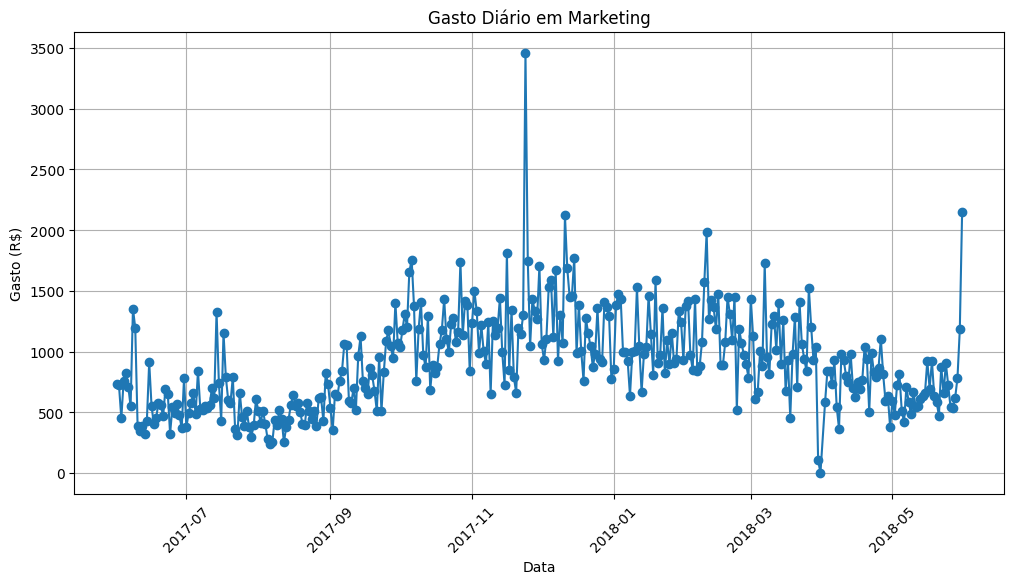

In [47]:
# Visualizando o gasto diário em um gráfico
plt.figure(figsize=(12, 6))
gasto_diario.plot(marker='o', linestyle='-')
plt.title("Gasto Diário em Marketing")
plt.xlabel("Data")
plt.ylabel("Gasto (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
    
As análises temporais estão muito boas! No entanto, o projeto exige análise temporal por coortes. O corte ROI deve seguir o passo a passo abaixo:
``` python   
## Código gerado pela revisora - Repare nos agrupamentos utilizando groupby 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ler os dados (já no seu caso)
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Renomeando as colunas em 'orders'
orders = orders.rename(columns={
    'Buy Ts': 'buy_ts',        # Renomeia 'Buy Ts' para 'buy_ts'
    'Revenue': 'revenue',      # Renomeia 'Revenue' para 'revenue'
    'Uid': 'uid'               # Renomeia 'Uid' para 'uid'
})


# 2. Converter as colunas relevantes para o formato datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# 3. Criar as colunas 'order_month' e 'first_order_month' em orders
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
orders['first_order_month'] = orders.groupby('uid')['order_month'].transform('min')

# 4. Agrupar os dados de custos e pedidos por mês
costs['costs_month'] = costs['dt'].dt.to_period('M')

# 5. Calcular o CAC por mês fazendo o merge entre custos e pedidos
CAC_por_mes = pd.merge(
    costs.groupby('costs_month').agg({'costs': 'sum'}),
    orders.groupby('first_order_month').agg({'uid': 'nunique'}),  # Número de usuários únicos
    left_index=True,
    right_index=True
)

# 6. Calcular o Custo de Aquisição (CAC)
CAC_por_mes['cac'] = CAC_por_mes['costs'] / CAC_por_mes['uid']

# 7. Plotar o CAC ao longo do tempo
CAC_por_mes['cac'].plot(figsize=(14,7), title='CAC Médio por mês', xlabel='Mês', ylabel='CAC (c.u.)')
plt.show()

# 8. Criar coortes com base no primeiro mês de pedido e calcular receita e número de compradores
cohorts = orders.groupby(['first_order_month', 'order_month']).agg(
    revenue=('revenue', 'sum'),
    n_buyers=('uid', 'nunique')  # Compradores únicos
).reset_index()

# 9. Calcular a duração da coorte em meses
cohorts['cohort_lifetime'] = (
    (cohorts['order_month'].dt.year - cohorts['first_order_month'].dt.year) * 12 +
    (cohorts['order_month'].dt.month - cohorts['first_order_month'].dt.month)
)

# 10. Ordenar as coortes por 'first_order_month' e 'cohort_lifetime'
cohorts = cohorts.sort_values(['first_order_month', 'cohort_lifetime'])

# 11. Agrupar os dados de custos por mês e fazer o merge com as coortes
cost_per_month = costs.groupby('costs_month').agg(costs=('costs', 'sum')).reset_index()

# Fazer o merge dos dados de custo com as coortes com base no 'order_month'
cohorts = pd.merge(cohorts, cost_per_month, left_on='order_month', right_on='costs_month')

# 12. Calcular CAC, LTV e ROMI
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']

# 13. Criar uma tabela dinâmica para o ROMI ao longo da duração da coorte
romi_pivot = cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean')

# 14. Calcular a soma cumulativa de ROMI para cada coorte
cum_sum_romi = romi_pivot.cumsum(axis=1).round(2)

# 15. Plotar o heatmap de ROMI
...continue o código
```
    
![image.png](attachment:image.png)

REALIZANDO AS ANALISES DE CAC E ROI POR COORTES:


In [48]:
costs_df

,source_id,dt,costs,date
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-02
2,1,2017-06-03,36.53,2017-06-03
3,1,2017-06-04,55.00,2017-06-04
4,1,2017-06-05,57.08,2017-06-05
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-27
2538,10,2018-05-28,21.26,2018-05-28
2539,10,2018-05-29,11.32,2018-05-29
2540,10,2018-05-30,33.15,2018-05-30


In [49]:
costs_df['month'] = costs_df['dt'].dt.to_period('M')

monthly_cost = costs_df.groupby('month')['costs'].sum().reset_index()

In [50]:
monthly_cost

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [51]:
cohort_sizes

,first_month,n_buyers
0,2017-06,2923
1,2017-07,2458
2,2017-08,1721
3,2017-09,3058
4,2017-10,4678
5,2017-11,4262
6,2017-12,4074
7,2018-01,3119
8,2018-02,3186
9,2018-03,2838


In [52]:
df_cac = pd.merge(left = monthly_cost, right = cohort_sizes, left_on='month', right_on = 'first_month')

In [53]:
df_cac['CAC'] = df_cac['costs']/df_cac['n_buyers']

In [54]:
df_cac

,month,costs,first_month,n_buyers,CAC
0,2017-06,18015.00,2017-06,2923,6.163189
1,2017-07,18240.59,2017-07,2458,7.420907
2,2017-08,14790.54,2017-08,1721,8.594155
3,2017-09,24368.91,2017-09,3058,7.968905
4,2017-10,36322.88,2017-10,4678,7.764617
5,2017-11,37907.88,2017-11,4262,8.894388
6,2017-12,38315.35,2017-12,4074,9.404848
7,2018-01,33518.52,2018-01,3119,10.746560
8,2018-02,32723.03,2018-02,3186,10.270882
9,2018-03,30415.27,2018-03,2838,10.717149


In [55]:
df_ltv

,Uid,first_month,Buy Ts,Revenue,month,month_diff_order,n_buyers,LTV
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01,4,3058,0.000180
1,12695041396440380,2017-09,2017-09-01 23:54:00,7.33,2017-09,0,3058,0.002397
2,12695041396440380,2017-09,2017-09-02 00:02:00,7.33,2017-09,0,3058,0.002397
3,16118742129536584,2017-09,2017-09-30 10:23:00,0.18,2017-09,0,3058,0.000059
4,16118742129536584,2017-09,2017-10-21 11:22:00,0.40,2017-10,1,3058,0.000131
...,...,...,...,...,...,...,...,...
50410,18413403606138337462,2018-05,2018-05-11 20:52:00,10.08,2018-05,0,2316,0.004352
50411,18417227789295707563,2018-05,2018-05-06 17:47:00,1.16,2018-05,0,2316,0.000501
50412,18418973552381796231,2018-05,2018-05-18 19:49:00,0.73,2018-05,0,2316,0.000315
50413,18419772037216346332,2018-05,2018-05-18 15:28:00,0.61,2018-05,0,2316,0.000263


In [56]:
df_romi = pd.merge(left = df_cac, right = df_ltv, on = 'first_month')

In [57]:
df_romi

,month_x,costs,first_month,n_buyers_x,CAC,Uid,Buy Ts,Revenue,month_y,month_diff_order,n_buyers_y,LTV
0,2017-06,18015.00,2017-06,2923,6.163189,1575281904278712,2017-06-03 10:13:00,1.22,2017-06,0,2923,0.000417
1,2017-06,18015.00,2017-06,2923,6.163189,1575281904278712,2017-06-03 17:39:00,1.83,2017-06,0,2923,0.000626
2,2017-06,18015.00,2017-06,2923,6.163189,16233238570251706,2017-06-06 20:31:00,1.65,2017-06,0,2923,0.000564
3,2017-06,18015.00,2017-06,2923,6.163189,28094489227360733,2017-07-20 18:10:00,1.22,2017-07,1,2923,0.000417
4,2017-06,18015.00,2017-06,2923,6.163189,28094489227360733,2017-07-28 16:50:00,2.22,2017-07,1,2923,0.000759
...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05,22224.27,2018-05,2316,9.595972,18413403606138337462,2018-05-11 20:52:00,10.08,2018-05,0,2316,0.004352
50411,2018-05,22224.27,2018-05,2316,9.595972,18417227789295707563,2018-05-06 17:47:00,1.16,2018-05,0,2316,0.000501
50412,2018-05,22224.27,2018-05,2316,9.595972,18418973552381796231,2018-05-18 19:49:00,0.73,2018-05,0,2316,0.000315
50413,2018-05,22224.27,2018-05,2316,9.595972,18419772037216346332,2018-05-18 15:28:00,0.61,2018-05,0,2316,0.000263


In [58]:
df_romi['ROMI']= df_romi['LTV']/df_romi['CAC']

In [59]:
df_romi

,month_x,costs,first_month,n_buyers_x,CAC,Uid,Buy Ts,Revenue,month_y,month_diff_order,n_buyers_y,LTV,ROMI
0,2017-06,18015.00,2017-06,2923,6.163189,1575281904278712,2017-06-03 10:13:00,1.22,2017-06,0,2923,0.000417,0.000068
1,2017-06,18015.00,2017-06,2923,6.163189,1575281904278712,2017-06-03 17:39:00,1.83,2017-06,0,2923,0.000626,0.000102
2,2017-06,18015.00,2017-06,2923,6.163189,16233238570251706,2017-06-06 20:31:00,1.65,2017-06,0,2923,0.000564,0.000092
3,2017-06,18015.00,2017-06,2923,6.163189,28094489227360733,2017-07-20 18:10:00,1.22,2017-07,1,2923,0.000417,0.000068
4,2017-06,18015.00,2017-06,2923,6.163189,28094489227360733,2017-07-28 16:50:00,2.22,2017-07,1,2923,0.000759,0.000123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05,22224.27,2018-05,2316,9.595972,18413403606138337462,2018-05-11 20:52:00,10.08,2018-05,0,2316,0.004352,0.000454
50411,2018-05,22224.27,2018-05,2316,9.595972,18417227789295707563,2018-05-06 17:47:00,1.16,2018-05,0,2316,0.000501,0.000052
50412,2018-05,22224.27,2018-05,2316,9.595972,18418973552381796231,2018-05-18 19:49:00,0.73,2018-05,0,2316,0.000315,0.000033
50413,2018-05,22224.27,2018-05,2316,9.595972,18419772037216346332,2018-05-18 15:28:00,0.61,2018-05,0,2316,0.000263,0.000027


In [60]:
df_romi.pivot_table(index = 'first_month', columns = 'month_diff_order', values = 'ROMI', aggfunc = 'mean').fillna('')

month_diff_order,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,0.000225,0.000382,0.000298,0.000488,0.000424,0.000366,0.000387,0.000383,0.000347,0.000608,0.000661,0.000364
2017-07,0.000274,0.000316,0.000298,0.000275,0.000242,0.000257,0.000227,0.000271,0.000263,0.000372,0.000294,
2017-08,0.000312,0.000305,0.00033,0.000357,0.000338,0.000337,0.000323,0.000581,0.000677,0.000302,,
2017-09,0.000201,0.000309,0.000263,0.001558,0.000392,0.000408,0.000205,0.000208,0.000153,,,
2017-10,0.000118,0.000169,0.000103,0.000124,0.000117,0.000129,0.000122,0.000114,,,,
2017-11,0.000111,0.000092,0.000096,0.000114,0.000096,0.000133,0.000105,,,,,
2017-12,0.000110,0.000098,0.000418,0.000535,0.000337,0.000294,,,,,,
2018-01,0.000108,0.000129,0.000136,0.000097,0.000128,,,,,,,
2018-02,0.000110,0.000147,0.000156,0.000198,,,,,,,,


In [61]:
romi_table = df_romi.pivot_table(index = 'first_month', columns = 'month_diff_order', values = 'ROMI', aggfunc = 'mean').cumsum(axis = 1)

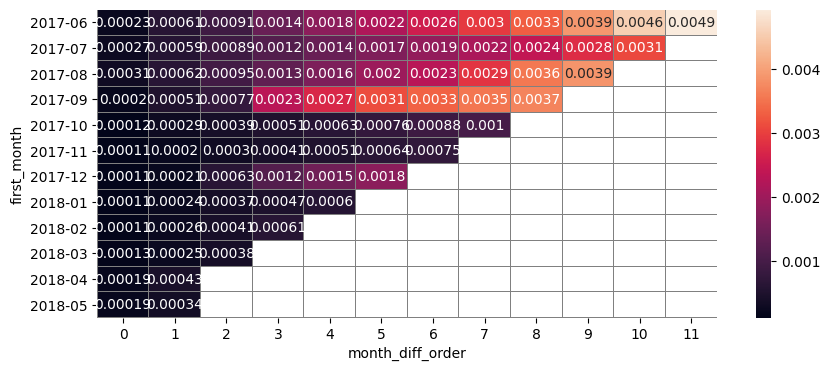

In [62]:
fig, ax = plt.subplots(figsize = (10,4))

sns.heatmap(romi_table, annot=True, linewidths=0.1, linecolor='grey', ax=ax)
plt.show()

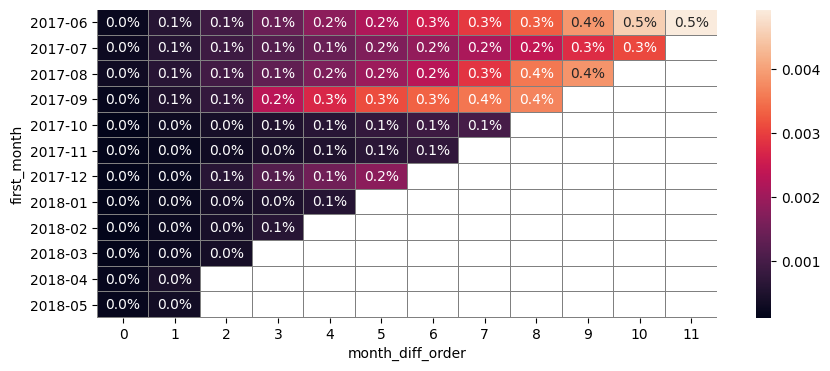

In [63]:
fig, ax = plt.subplots(figsize = (10,4))

sns.heatmap(romi_table, annot=True, fmt=".0000001%", linewidths=0.1, linecolor='grey', ax=ax)
plt.show()